### 10. Finding Corners

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

(720, 1280, 3)
(720, 1280)


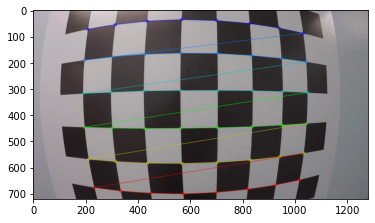

In [9]:
# Number of inside corners in x, y
nx = 8
ny = 6

fname = 'calibration_test.png'
img = cv2.imread(fname)
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

Keep in mind that "corners" are only points where two black and two white squares intersect, in other words, only count inside corners, not outside corners.

In [20]:
img.shape[:2][::-1]

(1280, 720)

In [27]:
print(corners.shape)
print(corners[:8])

(48, 1, 2)
[[[ 209.49168    72.759445]]

 [[ 314.52362    54.58995 ]]

 [[ 435.51456    42.035755]]

 [[ 567.81757    36.470123]]

 [[ 702.005      40.031147]]

 [[ 827.8688     51.39282 ]]

 [[ 938.9422     68.43589 ]]

 [[1032.1531     88.22164 ]]]


### 18. Undistort and Transform

In [21]:
import pickle

In [32]:
# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load(open('wide_dist_pickle.p', 'rb'))
mtx = dist_pickle['mtx']
dist = dist_pickle['dist']

# Read in an image
img = cv2.imread('test_image2.png')
nx = 8
ny = 6

In [39]:
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    undist_gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(undist_gray, (nx, ny), None)
    # 4) If corners found: 
    if ret == True:
            # a) draw corners
            cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # Select the upper-left block.
            src = np.array([corners[0], corners[2], corners[nx+2], corners[nx]])
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # define length of each block and the coordinate of upper-left corner of the first block.
            block_length = 150
            x0 = 100
            y0 = 100
            # select only one block is not enough, selected 2 blocks.
            dst = np.float32([[x0, y0], [x0+2*block_length, y0], 
                              [x0+2*block_length, y0+block_length], [x0, y0+block_length]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            M = cv2.getPerspectiveTransform(src, dst)
            # e) use cv2.warpPerspective() to warp your image to a top-down view
            img_size = (img.shape[1], img.shape[0])
            warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
    return warped, M

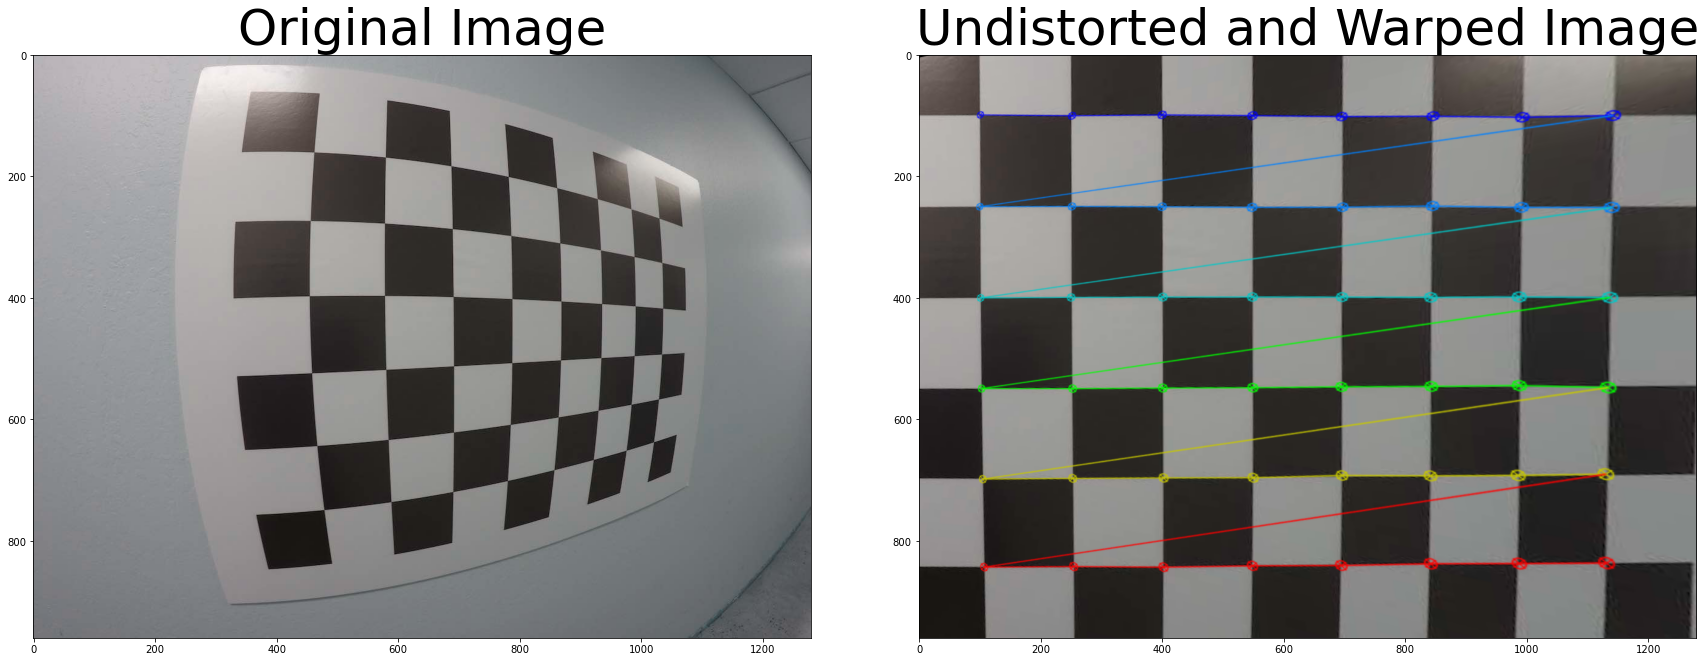

In [40]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

- The teacher's solution for choosing source and destination points is better. Rather than set x0, y0 and block_length (which may cause some corners outside of the image size), only use an offset (margin) on 4 corners: `[corners[0], corners[nx-1], corners[-1], corners[-nx]`.
- And the destination points would be `np.float32([[offset, offset], [img_size[0]-offset, offset], [img_size[0]-offset, img_size[1]-offset], [offset, img_size[1]-offset]])`